In [164]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from numpy import * 

Method 1 Standard Interpolating

In [165]:
##### Method involves simple interpolating between the two gaps without use for backup waterlevels

p21 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/Gap Filling/Pier21_Gaps.csv')

p21['Date'] = pd.to_datetime(p21['#date+time'])
p21['022-pwl'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
p21['pwl'] = pd.to_numeric(p21['022-pwl'])
p21['022-bwl'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
p21['bwl'] = pd.to_numeric(p21['022-bwl'])
p21['022-harmwl'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
p21['hrmwl'] = pd.to_numeric(p21['022-harmwl'])

p21 = p21.drop(columns='#date+time',axis=0)
p21 = p21.drop(columns='022-pwl',axis=0)
p21 = p21.drop(columns='022-bwl',axis=0)
p21 = p21.drop(columns='022-harmwl',axis=0)

p21

,Date,pwl,bwl,hrmwl
0,2001-01-01 00:00:00,1.523,1.835,1.412
1,2001-01-01 00:06:00,1.535,NaN,1.418
2,2001-01-01 00:12:00,1.547,NaN,1.424
3,2001-01-01 00:18:00,1.547,NaN,1.430
4,2001-01-01 00:24:00,1.558,NaN,1.436
...,...,...,...,...
14155,2001-02-28 23:30:00,1.554,1.814,1.528
14156,2001-02-28 23:36:00,1.551,NaN,1.530
14157,2001-02-28 23:42:00,1.550,NaN,1.531
14158,2001-02-28 23:48:00,1.560,NaN,1.532


In [166]:
p21['surge'] = p21['pwl'] - p21['hrmwl']

p21['surge'] = p21['surge']

p21

,Date,pwl,bwl,hrmwl,surge
0,2001-01-01 00:00:00,1.523,1.835,1.412,0.111
1,2001-01-01 00:06:00,1.535,NaN,1.418,0.117
2,2001-01-01 00:12:00,1.547,NaN,1.424,0.123
3,2001-01-01 00:18:00,1.547,NaN,1.430,0.117
4,2001-01-01 00:24:00,1.558,NaN,1.436,0.122
...,...,...,...,...,...
14155,2001-02-28 23:30:00,1.554,1.814,1.528,0.026
14156,2001-02-28 23:36:00,1.551,NaN,1.530,0.021
14157,2001-02-28 23:42:00,1.550,NaN,1.531,0.019
14158,2001-02-28 23:48:00,1.560,NaN,1.532,0.028


In [167]:
##### Method involves simple interpolating between the two gaps without use for backup waterlevels

p21t = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/Gap Filling/Pier21_Gaps_True.csv')

p21t['Date'] = pd.to_datetime(p21t['#date+time'])
p21t['022-pwl'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
p21t['pwl'] = pd.to_numeric(p21t['022-pwl'])
p21t['022-bwl'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
p21t['bwl'] = pd.to_numeric(p21t['022-bwl'])
p21t['022-harmwl'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
p21t['hrmwl'] = pd.to_numeric(p21t['022-harmwl'])

p21t = p21t.drop(columns='#date+time',axis=0)
p21t = p21t.drop(columns='022-pwl',axis=0)
p21t = p21t.drop(columns='022-bwl',axis=0)
p21t = p21t.drop(columns='022-harmwl',axis=0)
p21t['surge'] = p21t['pwl'] - p21t['hrmwl']


p21t[430:450]

,Date,pwl,bwl,hrmwl,surge
430,2001-01-02 19:00:00,1.341,1.663,1.377,-0.036
431,2001-01-02 19:06:00,1.337,NaN,1.375,-0.038
432,2001-01-02 19:12:00,1.334,NaN,1.372,-0.038
433,2001-01-02 19:18:00,1.330,NaN,1.369,-0.039
434,2001-01-02 19:24:00,1.323,NaN,1.367,-0.044
435,2001-01-02 19:30:00,1.318,1.641,1.365,-0.047
436,2001-01-02 19:36:00,1.324,NaN,1.363,-0.039
437,2001-01-02 19:42:00,NaN,NaN,1.361,NaN
438,2001-01-02 19:48:00,NaN,NaN,1.359,NaN
439,2001-01-02 19:54:00,NaN,NaN,1.357,NaN


In [168]:
mean_surge = p21t['surge'].mean()

std_surge = p21t['surge'].std()

threshold = 3

filtered_wl = p21t[(p21t['surge'] > mean_surge - threshold * std_surge) & (p21t['surge'] < mean_surge + threshold * std_surge)]

p21_corrected = p21t.merge(filtered_wl,on='Date',how='outer')
p21_corrected = p21_corrected.drop(columns='pwl_y',axis=0)
p21_corrected = p21_corrected.drop(columns='bwl_y',axis=0)
p21_corrected = p21_corrected.drop(columns='hrmwl_y',axis=0)
p21_corrected['surge_filtered'] = p21_corrected['surge_y']
p21_corrected = p21_corrected.drop(columns='surge_y',axis=0)

p21_corrected[430:450]

,Date,pwl_x,bwl_x,hrmwl_x,surge_x,surge_filtered
430,2001-01-02 19:00:00,1.341,1.663,1.377,-0.036,-0.036
431,2001-01-02 19:06:00,1.337,NaN,1.375,-0.038,-0.038
432,2001-01-02 19:12:00,1.334,NaN,1.372,-0.038,-0.038
433,2001-01-02 19:18:00,1.330,NaN,1.369,-0.039,-0.039
434,2001-01-02 19:24:00,1.323,NaN,1.367,-0.044,-0.044
435,2001-01-02 19:30:00,1.318,1.641,1.365,-0.047,-0.047
436,2001-01-02 19:36:00,1.324,NaN,1.363,-0.039,-0.039
437,2001-01-02 19:42:00,NaN,NaN,1.361,NaN,NaN
438,2001-01-02 19:48:00,NaN,NaN,1.359,NaN,NaN
439,2001-01-02 19:54:00,NaN,NaN,1.357,NaN,NaN


In [169]:
p21_corrected['Interpolated Surge'] = p21_corrected['surge_filtered'].interpolate().round(decimals=4)
#p21_corrected['Interpolated Surge'].round(decimals=3)
p21_corrected[430:450]

,Date,pwl_x,bwl_x,hrmwl_x,surge_x,surge_filtered,Interpolated Surge
430,2001-01-02 19:00:00,1.341,1.663,1.377,-0.036,-0.036,-0.0360
431,2001-01-02 19:06:00,1.337,NaN,1.375,-0.038,-0.038,-0.0380
432,2001-01-02 19:12:00,1.334,NaN,1.372,-0.038,-0.038,-0.0380
433,2001-01-02 19:18:00,1.330,NaN,1.369,-0.039,-0.039,-0.0390
434,2001-01-02 19:24:00,1.323,NaN,1.367,-0.044,-0.044,-0.0440
435,2001-01-02 19:30:00,1.318,1.641,1.365,-0.047,-0.047,-0.0470
436,2001-01-02 19:36:00,1.324,NaN,1.363,-0.039,-0.039,-0.0390
437,2001-01-02 19:42:00,NaN,NaN,1.361,NaN,NaN,-0.0393
438,2001-01-02 19:48:00,NaN,NaN,1.359,NaN,NaN,-0.0397
439,2001-01-02 19:54:00,NaN,NaN,1.357,NaN,NaN,-0.0400


(430.0, 450.0)

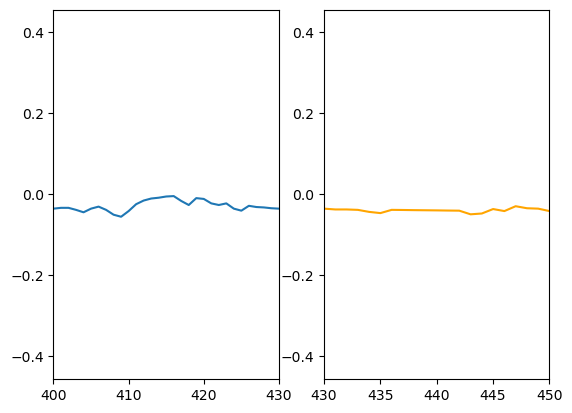

In [182]:
fig, axis = plt.subplots(1, 2) 

axis[0].plot(p21_corrected['surge_filtered'], label='Observed')
axis[1].plot(p21_corrected['Interpolated Surge'], label='Interpolated', color = 'Orange')

axis[0].set_xlim(400, 430)
axis[1].set_xlim(430, 450)

Text(0.5, 1.0, 'Polynomial Fit to Data')

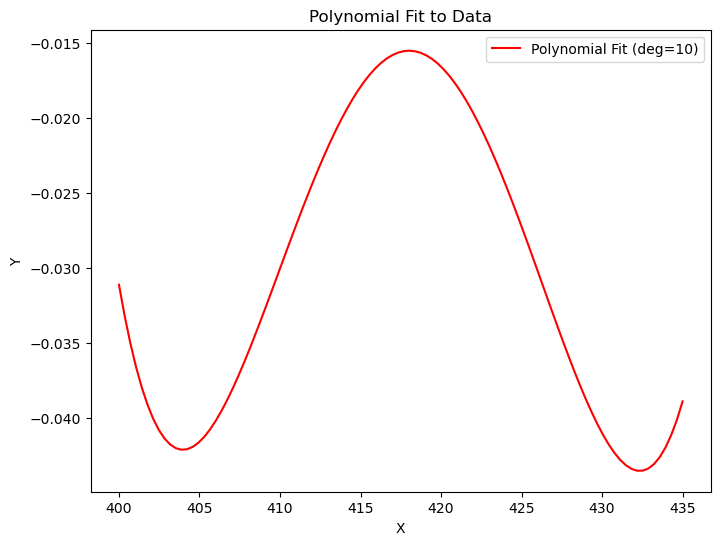

In [183]:
x_values = np.arange(400, 436)
coefficients = np.polyfit(x_values, p21_corrected['surge_filtered'][400:436], deg=4)


x_range = np.linspace(min(x_values), max(x_values), 100)
y_polyfit = np.polyval(coefficients, x_range)

plt.figure(figsize=(8,6))

plt.plot(x_range, y_polyfit, color='red', label=f'Polynomial Fit (deg=10)')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Polynomial Fit to Data')